In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train = pd.read_csv('train-spaceship.csv')
df_test = pd.read_csv('test-spaceship.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df_name_remove_train = df_train.drop(['Name'],axis=1)
df_name_remove_test = df_test.drop(['Name'],axis=1)

In [9]:
df_name_remove_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [13]:
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
CAT_OBJ = [col for col in df_name_remove_train.columns if df_name_remove_train[col].dtype=='object']
CAT_OBJ

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [16]:
for data in CAT_OBJ:
    df_name_remove_train[data] = le.fit_transform(df_name_remove_train[data])
df_name_remove_train['Transported'] = le.fit_transform(df_name_remove_train['Transported'])

In [17]:
df_name_remove_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [18]:
for data in CAT_OBJ:
    df_name_remove_test[data] = le.fit_transform(df_name_remove_test[data])
df_name_remove_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [19]:
#check missing data
df_name_remove_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_21144\3106624132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_name_remove_train.Age)


<Axes: xlabel='Age', ylabel='Density'>

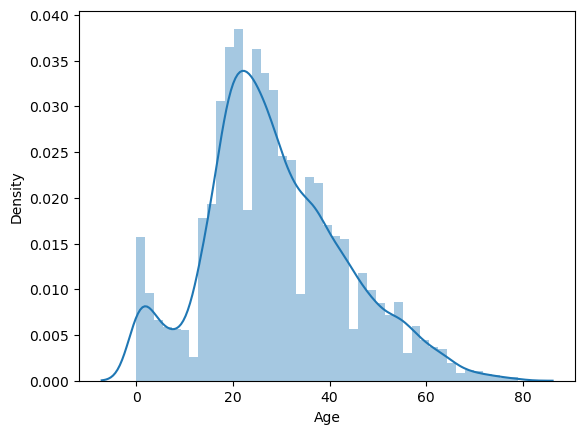

In [21]:
#handling with missing data
sns.distplot(df_name_remove_train.Age)

In [29]:
df_name_remove_train.fillna(df_name_remove_train['Age'].median(), inplace=True)
df_name_remove_test.fillna(df_name_remove_test['Age'].median(), inplace=True)

In [30]:
df_name_remove_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [31]:
df_name_remove_train['Age'].value_counts()

Age
27.0    438
24.0    324
18.0    320
21.0    311
19.0    293
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

In [32]:
df_name_remove_train['Transported'].value_counts()
#data has been balanced. Ready for training

Transported
1    4378
0    4315
Name: count, dtype: int64

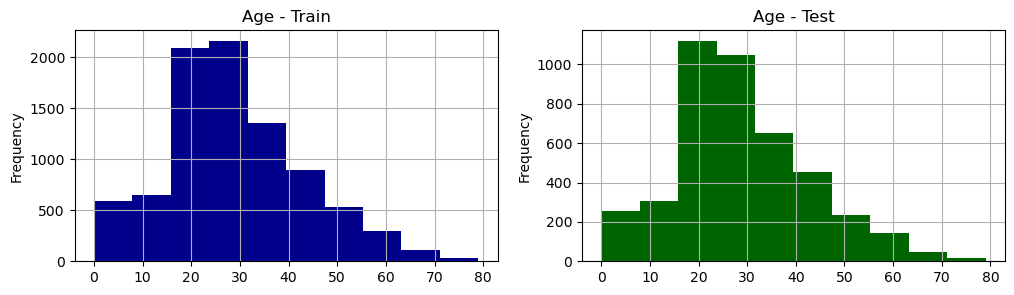

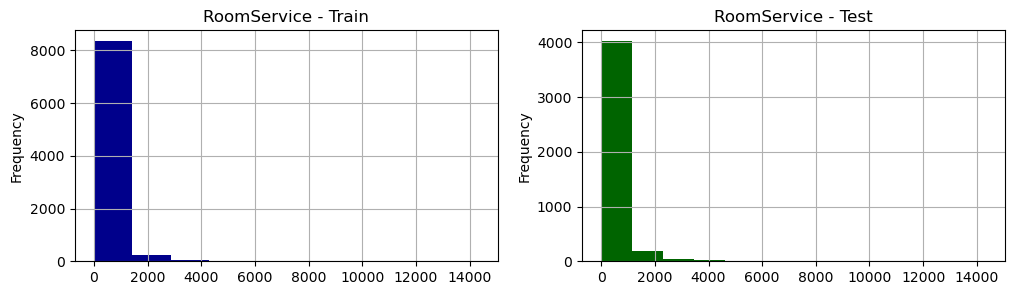

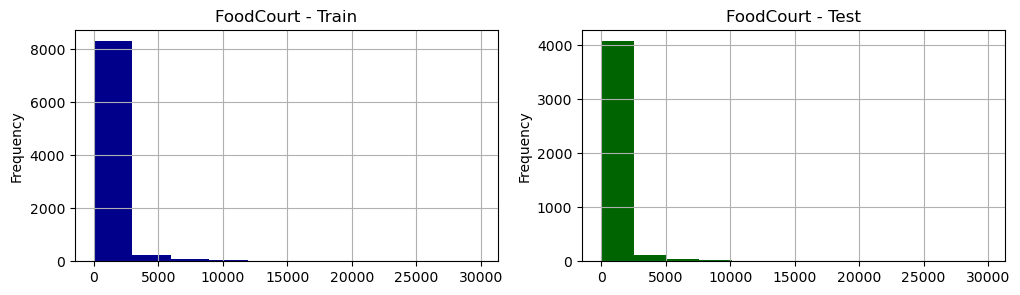

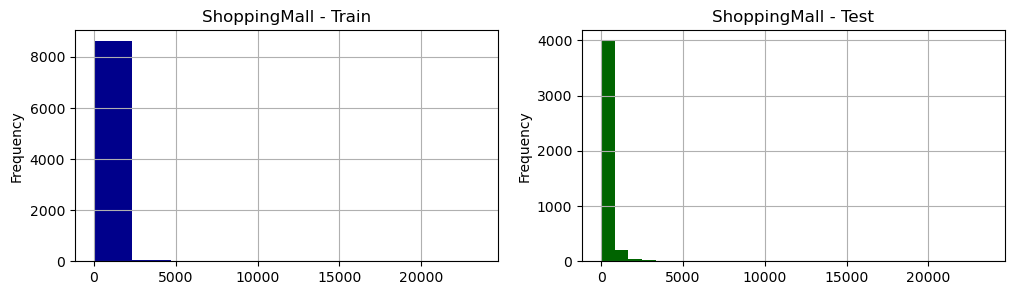

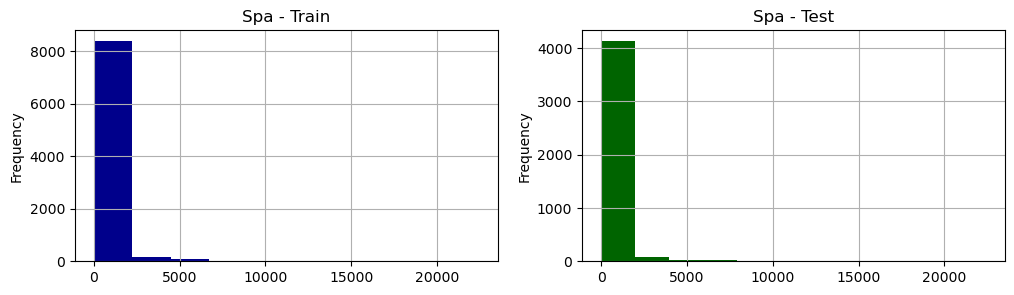

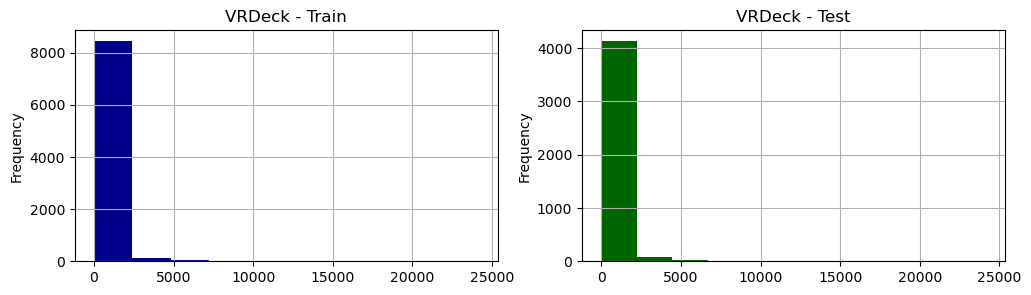

In [33]:
CAT_NUM = [col for col in df_name_remove_train.columns if df_name_remove_train[col].dtype=='float64']
#draw a plot
for f in CAT_NUM:
    plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    df_name_remove_train[f].plot(kind='hist', color='darkblue')
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_name_remove_test[f].plot(kind='hist', color='darkgreen')
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

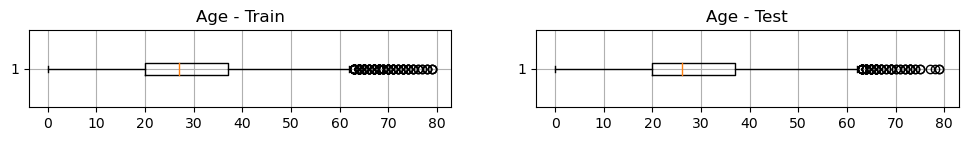

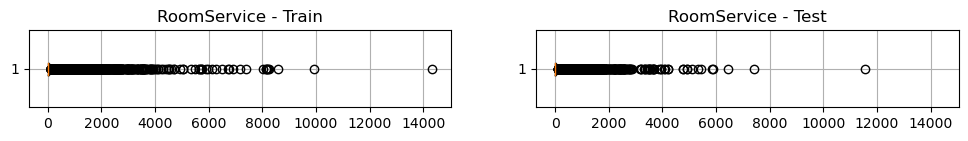

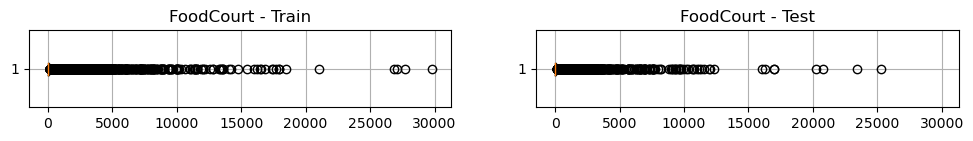

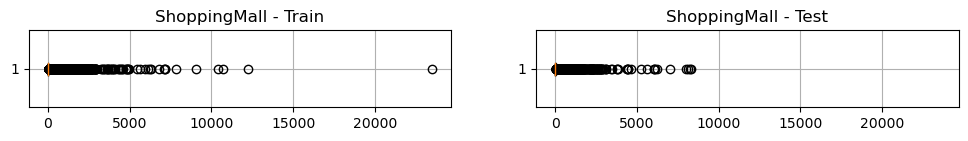

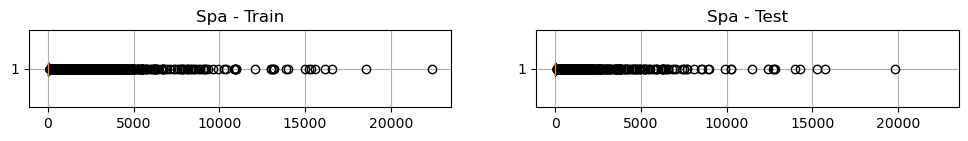

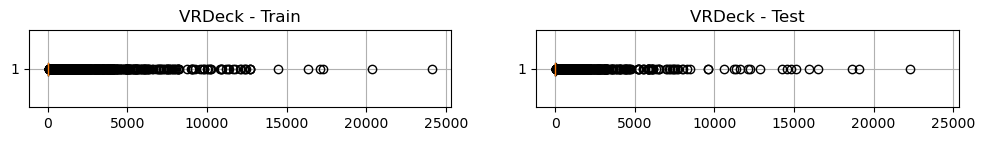

In [34]:
#boxplot
for f in CAT_NUM:
    plt.figure(figsize=(12,1))
    ax1 = plt.subplot(1,2,1)
    plt.boxplot(df_name_remove_train[f], vert=False)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    plt.boxplot(df_name_remove_test[f], vert=False)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

In [35]:
corr = df_name_remove_train.corr()
corr.Transported.sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.404716
HomePlanet      0.107755
FoodCourt       0.045614
PassengerId     0.021775
ShoppingMall    0.009490
VIP            -0.014260
Cabin          -0.052604
Age            -0.074233
Destination    -0.104817
VRDeck         -0.204882
Spa            -0.218580
RoomService    -0.241265
Name: Transported, dtype: float64

<Axes: >

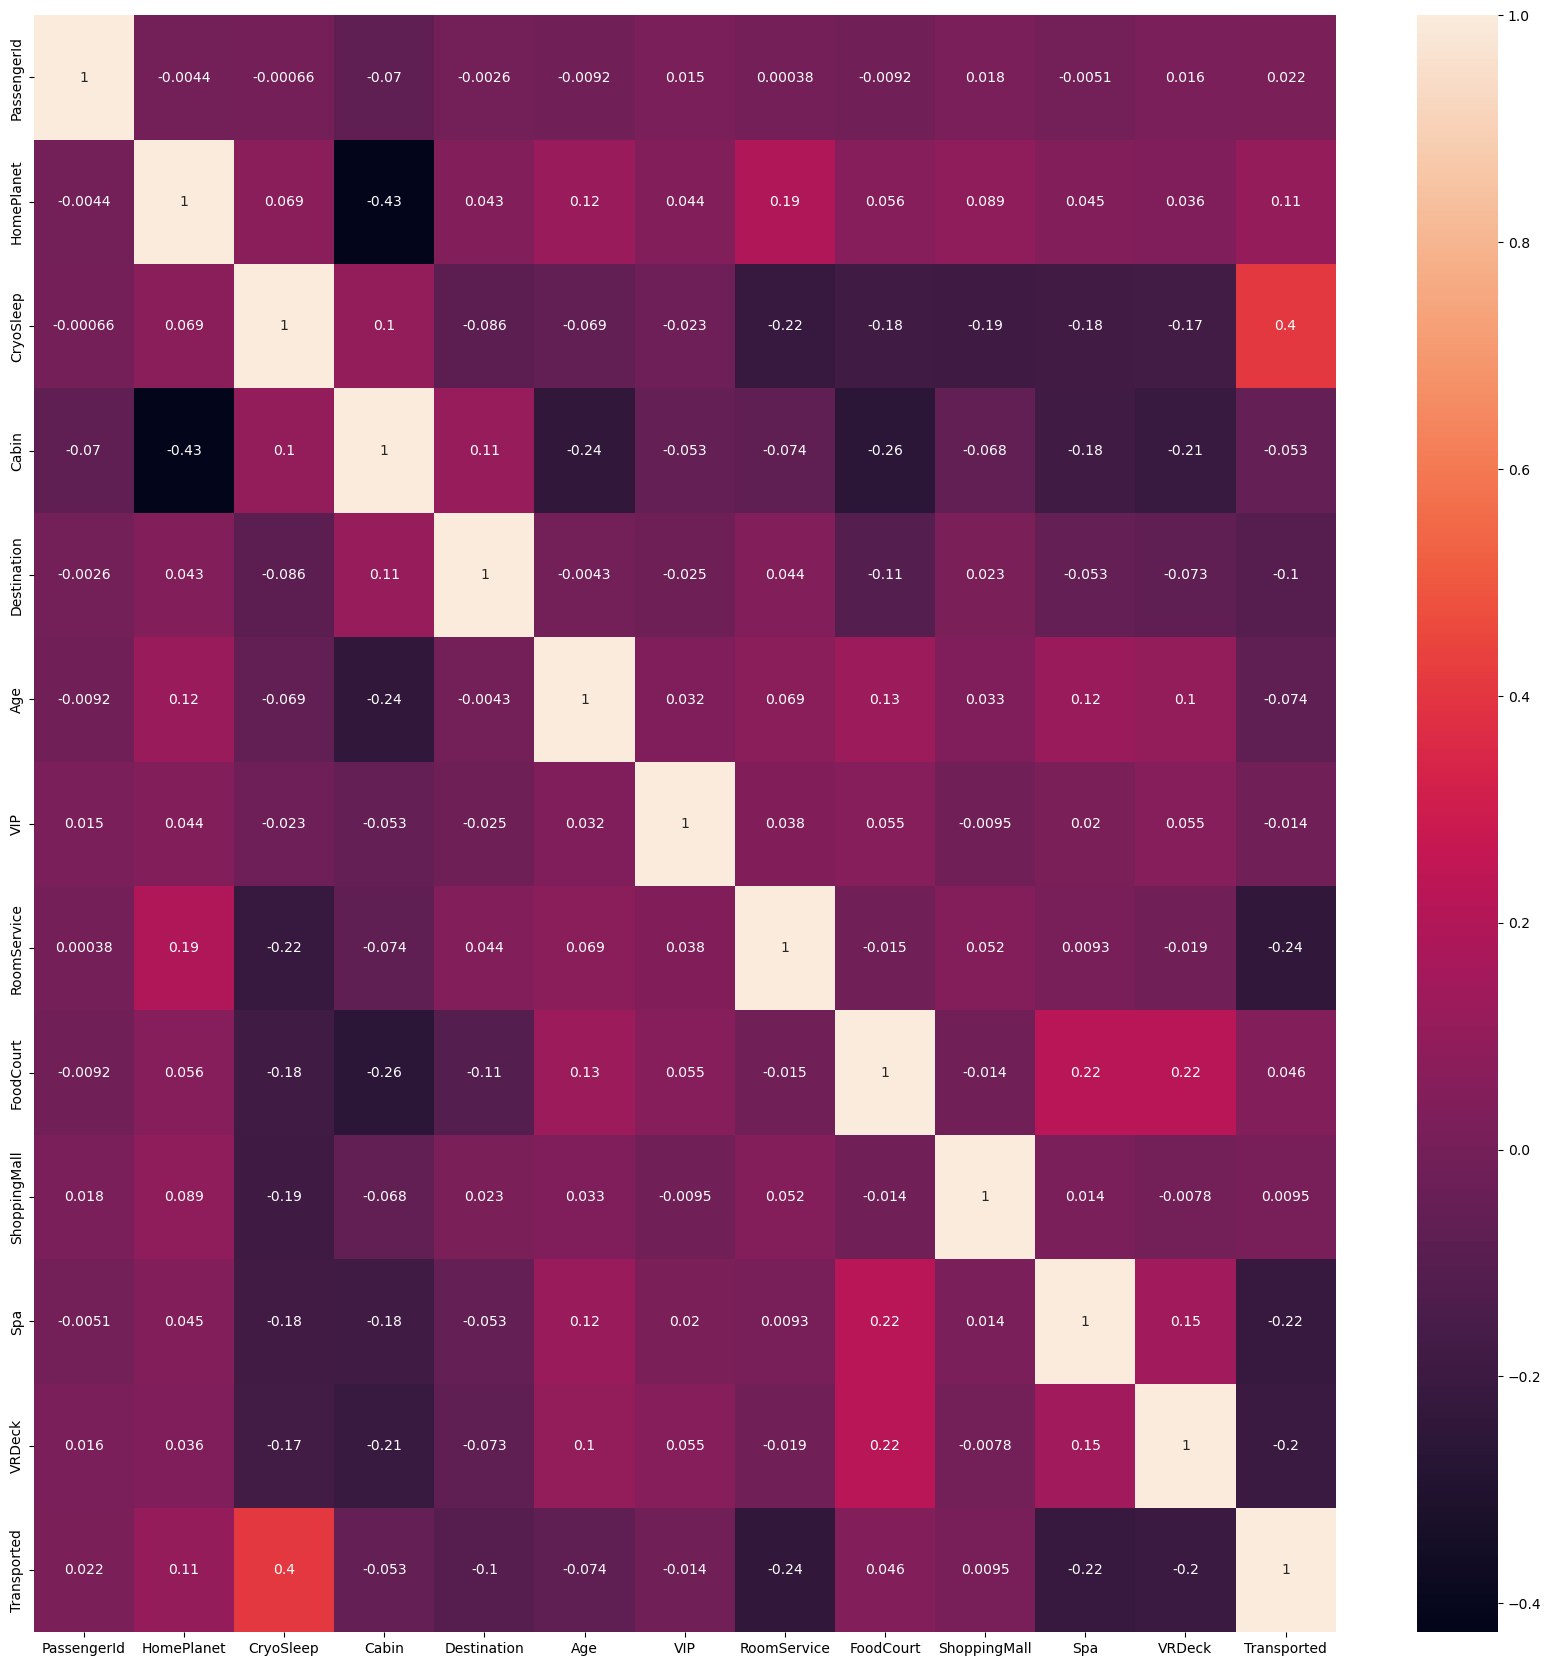

In [38]:
plt.figure(figsize=(21,21))
sns.heatmap(corr, annot=True)

In [39]:
#train test split
x = df_name_remove_train.drop(['Transported','PassengerId'],axis=1)
y = df_name_remove_train.Transported
print(x)
print(y)

      HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  RoomService  \
0              1          0    149            2  39.0    0          0.0   
1              0          0   2184            2  24.0    0        109.0   
2              1          0      1            2  58.0    1         43.0   
3              1          0      1            2  33.0    0          0.0   
4              0          0   2186            2  16.0    0        303.0   
...          ...        ...    ...          ...   ...  ...          ...   
8688           1          0    146            0  41.0    1          0.0   
8689           0          1   5280            1  18.0    0          0.0   
8690           0          0   5285            2  26.0    0          0.0   
8691           1          0   2131            0  32.0    0          0.0   
8692           1          0   2131            2  44.0    0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0           0.0     0.0     0.0  
1  

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((6954, 11), (1739, 11), (6954,), (1739,))

In [42]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier()
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(Xtest)[:,1]
auc = roc_auc_score(Ytest, y_pred_proba)
print("Validation AUC:", auc)

Validation AUC: 0.8810707737731462


In [45]:
Xtest = df_name_remove_test.drop(['PassengerId'], axis=1)

y_pred_proba_test = model.predict_proba(Xtest)[:, 1]

In [46]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [7],
    'min_child_weight': [5],
    'reg_alpha': [1.0],
    'subsample': [1.0]
}

In [65]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=3)

grid_search.fit(Xtrain, Ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **grid_search.best_params_)

best_xgb_model.fit(Xtrain, Ytrain)
y_pred = best_xgb_model.predict(Xtest)

# Convert probabilities to "True" or "False" based on the threshold
predicted_labels_str = np.where(y_pred_proba_test > threshold, 'True', 'False')

# Create a DataFrame with 'PassengerId' and 'Transported' columns
submission_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': predicted_labels_str
})

# submission_df = pd.DataFrame({'PassengerId': df_name_remove_test['PassengerId'], 'Transported': y_pred_proba_test})
submission_df.to_csv('Hoang-Submit.csv', index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.882 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.890 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.879 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.880 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.893 total time=   0.1s
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 1.0, 'subs